In [14]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPool1D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
length_values = 60

In [3]:
global_data = {}

# key : value
# uniq_id : [60 values, label]

In [4]:
def plot_image(data) :
    plt.plot(data.index,data.TBS_1.cumsum(),'bo', color='blue')
    plt.plot(data.index,data.TBS_1.cumsum(), color='blue')  
    
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    
    plt.plot(data.index,data.TBS_2.cumsum(),'bo', color='orange')
    plt.plot(data.index,data.TBS_2.cumsum(), color='orange')  

def reformat_data(filename, global_data) :
    
    data = pd.read_csv(filename)
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    #data.drop(columns={})
    data.set_index(pd.to_datetime(data.Time), inplace=True)
    
    id_acquis = data.id_acquisition.iloc[0]
    
    for val in tqdm(data.connection_id.unique()):
        current_data = data[data.connection_id==val]
        label = current_data.label.value_counts(sort = True, ascending =False).index[0]
        #print(current_data)
        
        #print("___")
        #print(current_data.resample('s').mean())
        current_data_2 = current_data.resample('s').mean()
        current_data_2 = current_data_2.interpolate()
        
        #print(len(current_data_2))
        
        if len(current_data_2)>=length_values :
            #we only keep the first 60 seconds to begin
            current_data_2= current_data_2.iloc[0:length_values]
            #print(current_data_2)
            #àprint(current_data_2.shape)
            
            
            
            global_data[f"{id_acquis}_{val}"]=(current_data_2.TBS_1, current_data_2.TBS_2,label)
            
        
       
        
        
        
        
        
        
        
        
        
        #plot_image(current_data_2)
        
        #print(a)
    return global_data
        
     

In [5]:
directory_data = "./Mesures/"
datasets = [i for i in os.listdir(directory_data) if i.endswith(".csv") ]
datasets

for i, data in enumerate(datasets) :
    file = os.path.join(directory_data,data)
    print(f"Extracting {file}.... {i+1}/{len(datasets)}")
    global_data = reformat_data(file, global_data)

Extracting ./Mesures/messenger20221117_125310.csv.... 1/26


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 36.71it/s]


Extracting ./Mesures/messenger20221124_143112.csv.... 2/26


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 13.37it/s]


Extracting ./Mesures/messenger20221124_151137.csv.... 3/26


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.44it/s]


Extracting ./Mesures/messenger20221125_130559.csv.... 4/26


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:01<00:00, 27.22it/s]


Extracting ./Mesures/messenger20221125_150706.csv.... 5/26


100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:09<00:00, 35.75it/s]


Extracting ./Mesures/messenger20221129_131204.csv.... 6/26


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  4.87it/s]


Extracting ./Mesures/messenger20221129_151124.csv.... 7/26


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.30it/s]


Extracting ./Mesures/skype20221129_164105.csv.... 8/26


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.88it/s]


Extracting ./Mesures/skype20221206_125510.csv.... 9/26


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 13.40it/s]


Extracting ./Mesures/skype20221206_150902.csv.... 10/26


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


Extracting ./Mesures/skype20221208_104403.csv.... 11/26


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.21it/s]


Extracting ./Mesures/skype20221208_124925.csv.... 12/26


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.12s/it]


Extracting ./Mesures/skype20221215_151512.csv.... 13/26


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 17.32it/s]


Extracting ./Mesures/skype20221215_155618.csv.... 14/26


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.66it/s]


Extracting ./Mesures/skype20221215_164208.csv.... 15/26


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.63it/s]


Extracting ./Mesures/skype20221215_174819.csv.... 16/26


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.94it/s]


Extracting ./Mesures/twitch20221117_113554.csv.... 17/26


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.88it/s]


Extracting ./Mesures/twitch20221118_075454.csv.... 18/26


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 20.12it/s]


Extracting ./Mesures/twitch20221124_163054.csv.... 19/26


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00,  8.25it/s]


Extracting ./Mesures/twitch20221125_133859.csv.... 20/26


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:04<00:00, 24.59it/s]


Extracting ./Mesures/youtube20221108_165214.csv.... 21/26


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 68.17it/s]


Extracting ./Mesures/youtube20221108_182416.csv.... 22/26


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 50.01it/s]


Extracting ./Mesures/youtube20221118_104205.csv.... 23/26


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:02<00:00, 100.55it/s]


Extracting ./Mesures/youtube20221124_125524.csv.... 24/26


100%|███████████████████████████████████████████████████████████████████████████████| 188/188 [00:01<00:00, 127.09it/s]


Extracting ./Mesures/youtube20221124_154037.csv.... 25/26


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 121.94it/s]


Extracting ./Mesures/youtube20221130_103723.csv.... 26/26


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 139.20it/s]


In [57]:
len(global_data.values())

228

In [58]:
list_labels = [i[2] for i in global_data.values()]
distrib = dict((x,list_labels.count(x)) for x in set(list_labels))
distrib

{'noise': 43, 'twitch': 39, 'messenger': 54, 'skype': 35, 'youtube': 57}

In [67]:
label_one_hot = [list(distrib.keys()).index(elem) for elem in list_labels ]
label_one_hot = [np.array([1 if i==class__ else 0 for i in range(len(distrib.keys()))]) for class__ in label_one_hot]
label_one_hot

[array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),
 array([0, 0, 1, 0, 0]),


In [68]:
#df = pd.DataFrame(data={'images': [np.array([i[0].values, i[1].values]) for i in global_data.values()],
#                        'labels': [i[2] for i in global_data.values()]})


TBS_1_to_scale = np.array([i[0].values for i in  global_data.values()])
TBS_2_to_scale = np.array([i[1].values for i in  global_data.values()])
                          
scaler = StandardScaler()
TBS_1_scaled = scaler.fit_transform(TBS_1_to_scale)
scaler = StandardScaler()
TBS_2_scaled = scaler.fit_transform(TBS_2_to_scale)

In [82]:
BATCH_SIZE = 16


df = pd.DataFrame(data={'images': [ np.transpose(np.array([TBS_1_scaled[i], TBS_2_scaled[i]])) for i in range(len(global_data.values()))],
                        'labels': label_one_hot})

df


,images,labels
0,"[[-0.6372559766242273, -0.07188975641340825], ...","[0, 0, 1, 0, 0]"
1,"[[-0.742301143092083, -0.07188975641340825], [...","[0, 0, 1, 0, 0]"
2,"[[-0.5594112473013593, -0.07188975641340825], ...","[0, 0, 1, 0, 0]"
3,"[[0.42672950239756996, 15.026349424376699], [-...","[0, 0, 1, 0, 0]"
4,"[[-0.755431788900565, -0.07188975641340825], [...","[0, 0, 1, 0, 0]"
...,...,...
223,"[[-0.6414299567487778, -0.07188975641340825], ...","[0, 0, 0, 0, 1]"
224,"[[0.33213121871714707, -0.07188975641340825], ...","[0, 0, 0, 0, 1]"
225,"[[-0.6309950064374015, -0.07188975641340825], ...","[0, 0, 0, 0, 1]"
226,"[[-0.6406995102269815, -0.07188975641340825], ...","[0, 0, 0, 0, 1]"


In [83]:
dataset_tf = tf.data.Dataset.from_tensor_slices((list(df['images'].values), list(df['labels'].values))).batch(BATCH_SIZE)

In [84]:
train_size = int(len(dataset_tf)*.7)
val_size = int(len(dataset_tf)*.2)+0
test_size = int(len(dataset_tf)*.1)+1

train = dataset_tf.take(train_size)
val =dataset_tf.skip(train_size).take(val_size)
test= dataset_tf.skip(train_size + val_size).take(test_size)

In [85]:
#images_train, _ = tuple(zip(*train))
#images_train = np.concatenate(images_train)
#images_train.shape

In [86]:
# Model


In [94]:
model = Sequential()

model.add(Conv1D(32, 5, activation='relu', input_shape=(length_values,2)))
model.add(MaxPool1D()) #Adding a convultion layer

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D()) #

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(distrib.keys()), activation='sigmoid'))




In [95]:
#Conv 1 : output_shape= (None, length_values-5+1,32)    (None, 56,32)
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 56, 32)            352       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 28, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 24, 64)            10304     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 8, 32)             10272     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 4, 32)           

In [96]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs =50, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/50
10/10 [==============================] - 3s 69ms/step - loss: 0.6726 - accuracy: 0.3063 - val_loss: 0.6424 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 17ms/step - loss: 0.5123 - accuracy: 0.3375 - val_loss: 0.8676 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 19ms/step - loss: 0.4699 - accuracy: 0.4688 - val_loss: 1.0422 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 19ms/step - loss: 0.4533 - accuracy: 0.2500 - val_loss: 1.1858 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4416 - accuracy: 0.2500 - val_loss: 1.3725 - val_accuracy: 0.0833
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4303 - accuracy: 0.3438 - val_loss: 1.5013 - val_accuracy: 0.1458
Epoch 7/50
10/10 [==============================] - 0s 20ms/step - loss: 0.4163 - accuracy: 0.3500 - val_loss: 1.6154 - val_accuracy: 0.14

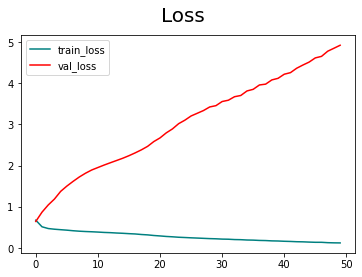

In [98]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='train_loss')
plt.plot(hist.history['val_loss'], color ='red', label ='val_loss')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()